In [ ]:
'''
problema 1: congelar os pesos do gerador e do crítico quando estiver compilando o crítico e a gan na ordem errada
problema 2: usar do UpSampling + Conv2D em WGANs , podemos usar esta combinação nas GANs clássicas mas as WGANs devem usar apenas camadas convolucionais transpostas
problema 3: prestar muita atenção nos números dos parâmetros dos superparâmetros, no caso foi o learning_rate de 0.005 e deveria ser de 4 casas decimais e não de 3, então 0.0005 ou 0.0002
problema 4: além de congelar os modelos congele as camadas (não entendo o porquê da redundância e o porquê de não ter dado erro antes, talvez é coisa das wgans-gp), faça isso com laço "for" e modelo.layers = True/False
problema 5: parece que o RMSprop não funciona muito bem, mas não tenho certeza
problema 6: não pode usar funções de ativação de regressão nos outputs do discriminador e do gerador (óbvio porra!) 
            nas gans tradicionais
problema 7: nas gans tradicionais não use tanh como ativação para saída do gerador, use o softmax mesmo
'''

'''
por que WGAN-GP não pode usar o UpSampling com Conv2D, (se não o gerador só produz imagens monocromáticas)
eu estava usando destas camadas quando o learning-rate do otimizador era 0.005, e se eu usar estas camadas agora mas com lr de 0.0005
que é lr correto ?
'''

'''
entender BatchNormalization e InstanceNormalization
'''

'''
https://www.google.com.br/search?q=Kullback%E2%80%93Leibler+%28KL%29+divergence&source=lmns&hl=pt-BR&sa=X&ved=2ahUKEwir2din3bb0AhVaA7kGHWBnCY4Q_AUoAHoECAEQAA
https://en.wikipedia.org/wiki/Covariance_matrix
https://en.wikipedia.org/wiki/Multivariate_normal_distribution
https://arxiv.org/pdf/1502.03167.pdf (Batch Normalization)
https://arxiv.org/abs/1312.6114 (Auto-Encoding Variational Bayes)
https://www.seldon.io/what-is-covariate-shift/
https://medium.com/swlh/what-are-rbms-deep-belief-networks-and-why-are-they-important-to-deep-learning-491c7de8937a
https://www.google.com.br/search?q=moro&sxsrf=AOaemvJDm5BW9TFzt8SO86Ad9g5v9_GQ0g%3A1637297522108&source=hp&ei=ci2XYcjvA5zU1sQPo96dwAI&iflsig=ALs-wAMAAAAAYZc7gkEn2Yy4D3QSHufYvt-h5ippKtjV&gs_ssp=eJzj4tVP1zc0TDKLzzaxrMgyYPRiyc0vygcAQRUGLA&oq=moro&gs_lcp=Cgdnd3Mtd2l6EAMYADILCC4QgAQQsQMQgwEyCAgAEIAEELEDMgsIABCABBCxAxCDATIICAAQgAQQsQMyBQgAEIAEMgUIABCABDIICAAQgAQQsQMyCAgAEIAEELEDMgsIABCABBCxAxCDATIICAAQsQMQgwE6BAgjECc6EQguEIAEELEDEIMBEMcBENEDOgUILhCABDoRCC4QgAQQsQMQgwEQxwEQowI6DgguEIAEELEDEMcBEKMCOgsILhCABBDHARCvAToICC4QgAQQsQM6BwguEIAEEAo6BwgAEIAEEAo6BwguELEDEAo6DQguELEDEMcBENEDEAo6BAguEAo6BwgAELEDEAo6BAgAEAo6BQgAELEDUABY0xZgoSdoBHAAeACAAc8BiAHnC5IBBTAuNi4ymAEAoAEB&sclient=gws-wiz
https://www.google.com.br/search?sxsrf=AOaemvJm-Kq0ajsJYr1Ct9dibkm5DN2Mig:1637433365594&q=Contra+o+sistema+da+corrup%C3%A7%C3%A3o&stick=H4sIAAAAAAAAAONgFuLVT9c3NEwyi882sazIUoJwi9KSCkyKCsy0BBxLSzLyi0LynfLzs_3zcioXsco75-eVFCUq5CsUZxaXpOYmKqQkKiTnFxWVFhxefnhx_g5WRgBGOCoVVwAAAA&sa=X&ved=2ahUKEwjaouXQyqf0AhWrq5UCHdnpBccQxA16BAhLEAQ
https://mangalivre.net/ler/battle-royale/online/28933/capitulo-14#/!page7
https://mangayabu.top/ler/monster-capitulo-10-my26331/
https://developers.google.com/machine-learning/crash-course/exercises
https://www.google.com.br/search?q=loss+function+in+vae&sxsrf=AOaemvJLEvoHARrv_kqZ-KsOyz_nxyoYvA%3A1637962222040&source=hp&ei=7VGhYYDSPJTJ5OUPp6OxoA8&iflsig=ALs-wAMAAAAAYaFf_nn8oOF6bWq1kj4DyZ4NLLz1_097&oq=loss+function+in+VAE&gs_lcp=Cgdnd3Mtd2l6EAMYADIFCAAQywE6BAgjECc6BggjECcQEzoRCC4QgAQQsQMQgwEQxwEQowI6CwgAEIAEELEDEIMBOgsILhCABBCxAxCDAToFCC4QgAQ6CAguEIAEELEDOgUIABCABDoOCC4QgAQQsQMQxwEQowI6BAgAEEM6DgguEIAEELEDEMcBENEDOgcILhCxAxBDOggIABCABBCxAzoECAAQDToGCAAQDRAeOgYIABAWEB5QAFjhU2DzXGgBcAB4AYAByASIAbIwkgEMMC4xMC4zLjIuNC4ymAEAoAEB&sclient=gws-wiz
https://www.google.com.br/search?q=variational+autoencoder&sxsrf=AOaemvJm9i2zxSBmUGQ_6zkpjK0R2p-dRw%3A1637962235692&ei=-1GhYZSwKerW1sQP87-M4A4&oq=vari&gs_lcp=Cgdnd3Mtd2l6EAMYADIECAAQQzILCAAQgAQQsQMQgwEyCwgAEIAEELEDEIMBMgQIABBDMggIABCxAxCDATIICC4QgAQQsQMyBAgAEEMyCAgAEIAEELEDMgQIABBDMggIABCABBCxAzoHCCMQ6gIQJzoECCMQJzoRCC4QgAQQsQMQgwEQxwEQ0QM6BQgAEIAESgQIQRgAUNIVWNccYOokaAFwAngAgAG2AYgBygWSAQMwLjSYAQCgAQGwAQrAAQE&sclient=gws-wiz
livro https://get.oreilly.com/rs/107-FMS-070/images/Software-Architecture-Patterns.pdf?mkt_tok=MTA3LUZNUy0wNzAAAAGA_SPMUZrlE0nKiSA5t3qSIhzr-TYykLL1KtHIhU3NvP-i66VmhJfm8G6ph7d-0cJ3ccVYUgbqDKYudwIqhtdzymCqF6xCkDxIJZJr5LtbVicukg
https://www.deeplearningbook.com.br/reconhecimento-de-imagens-com-redes-neurais-convolucionais-em-python-parte-4/
https://machinelearningknowledge.ai/keras-model-training-functions-fit-vs-fit_generator-vs-train_on_batch/
https://arxiv.org/pdf/1701.00160v4.pdf
https://arxiv.org/pdf/1406.2661.pdf
dataset gan https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap;tab=objects?pli=1&prefix=&forceOnObjectsSortingFiltering=false
calcular parametros https://dingyan89.medium.com/calculating-parameters-of-convolutional-and-fully-connected-layers-with-keras-186590df36c6
https://github.com/davidADSP/GDL_code/blob/master/03_06_vae_faces_analysis.ipynb
wasserstein gan https://arxiv.org/pdf/1701.07875.pdf
https://arxiv.org/pdf/2106.13112.pdf
https://en.wikipedia.org/wiki/Lipschitz_continuity
https://jonathan-hui.medium.com/gan-wasserstein-gan-wgan-gp-6a1a2aa1b490
WGAN com penalidade gradiente https://arxiv.org/pdf/1704.00028.pdf
series temporais para bitcoin https://arxiv.org/pdf/2107.06008.pdf
github do Ronald t kneusel https://github.com/rkneusel9/MathForDeepLearning/
sobre wgangp https://jonathan-hui.medium.com/gan-wasserstein-gan-wgan-gp-6a1a2aa1b490
conteudo legal sobre ml vision https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/
opera gx https://www.opera.com/pt-br/gx
quais métodos de treino para convergência de uma GAN https://arxiv.org/pdf/1801.04406.pdf
um artigo sobre convergencia local e global de " Métodos de Filtro de Busca de Linha" para programação não linear
sobre wgan-gp no towards https://towardsdatascience.com/demystified-wasserstein-gan-with-gradient-penalty-ba5e9b905ead
dos 9 tu ja tem 3 livros https://machinelearningmastery.com/books-on-generative-adversarial-networks-gans/
cycle gan https://arxiv.org/pdf/1703.10593.pdf  
cycle gan https://arxiv.org/pdf/1611.07004.pdf  
de convexo para não-convexo https://core.ac.uk/download/pdf/213011306.pdf
U-Net: Convolutional Networks for Biomedical Image Segmentation https://arxiv.org/pdf/1505.04597.pdf
Instance Normalization https://arxiv.org/pdf/1607.08022.pdf
instance normalization pela primeira vez https://openaccess.thecvf.com/content_cvpr_2017/papers/Ulyanov_Improved_Texture_Networks_CVPR_2017_paper.pdf
sobre patchGAN https://arxiv.org/pdf/1911.02274.pdf
sobre patchGAN https://arxiv.org/ftp/arxiv/papers/2107/2107.00143.pdf
Deep Residual Learning for Image Recognition https://arxiv.org/pdf/1512.03385.pdf
A Neural Algorithm of Artistic Style https://arxiv.org/pdf/1508.06576.pdf
Generating Videos with Scene Dynamics https://arxiv.org/pdf/1609.02612.pdf
Generative Adversarial Text to Image Synthesis https://arxiv.org/pdf/1605.05396.pdf
Controlling Deep Image Synthesis with Sketch and Color https://ieeexplore.ieee.org/document/8100206
neocogniton https://www.rctn.org/bruno/public/papers/Fukushima1980.pdf

hadamard produto https://www.google.com.br/search?q=Hadamard+product&source=lmns&hl=pt-BR&sa=X&ved=2ahUKEwid_ti5_on1AhXeM7kGHScIBnkQ_AUoAHoECAEQAA
correlação de pearson e spearman https://www.google.com.br/search?q=correla%C3%A7%C3%A3o+de+pearson+e+spearman&sxsrf=AOaemvKXv63B7JwXT2xIXOTeIkH2tP5uZA:1640798835901&source=lnms&tbm=vid&sa=X&ved=2ahUKEwj2rYv-w4n1AhUqqJUCHVtECU0Q_AUoAnoECAEQBA&biw=1396&bih=685&dpr=1.38
cross product https://www.google.com.br/search?q=cross+product&sxsrf=AOaemvKPEiOgjcphVZqigwsNu3P2YVebTQ%3A1640903927876&ei=9zTOYYXrNPXX1sQPv7W7uAw&ved=0ahUKEwjFwuy9y4z1AhX1q5UCHb_aDscQ4dUDCA4&uact=5&oq=cross+product&gs_lcp=Cgdnd3Mtd2l6EAMyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEOgcILhDqAhAnOgcIIxDqAhAnOgQIABBDOgcIABCxAxBDOgoIABCxAxCDARBDOg0ILhCxAxDHARCjAhBDOg4ILhCABBCxAxDHARCjAjoICC4QgAQQsQM6DgguEIAEELEDEMcBENEDOgQIIxAnOgYIIxAnEBM6CwguEIAEELEDEIMBOggIABCABBCxAzoFCC4QgAQ6CwguEIAEEMcBEK8BOgcIABCxAxAKOgoIABCxAxCDARAKOgcIABCABBAKOhAILhCABBCxAxDHARCjAhAKOgUIABCxA0oECEEYAEoECEYYAFDQEFiRTGDhVGgCcAJ4AIAB6ASIAd0ZkgELMC45LjMuMS4wLjGYAQCgAQGwAQrAAQE&sclient=gws-wiz

françois chollet, Ian Goodfellow, Geoffrey Hinton(pai da retropopagação), 
'''

In [1]:
!python -V

Python 3.9.7


In [3]:
import tensorflow as tf

In [4]:
tf.__version__

'2.6.2'

In [12]:
texto = pandas.read_fwf('https://www.gutenberg.org/cache/epub/11339/pg11339.txt')

In [13]:
texto

,"ï»¿The Project Gutenberg EBook of Aesop's Fables, by Aesop"
0,This eBook is for the use of anyone anywhere a...
1,almost no restrictions whatsoever. You may co...
2,re-use it under the terms of the Project Guten...
3,with this eBook or online at www.gutenberg.org
4,Title: Aesop's Fables
...,...
4039,https://www.gutenberg.org/1/0/2/3/10234
4040,or filename 24689 would be found at:
4041,https://www.gutenberg.org/2/4/6/8/24689
4042,An alternative method of locating eBooks:


In [22]:
oi = ''' The 'Project 'Gutenberg EBook of Aesops Fables, by Aesop This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org 

Title: Aesops 'Fables'
'''

In [23]:
oi

" The 'Project 'Gutenberg EBook of Aesops Fables, by Aesop This eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org \n\nTitle: Aesops 'Fables'\n"

In [3]:
import os
os.path.isfile('C:/Users/pituc/Downloads/gutenberg_texto.txt')

True

In [4]:
with open('C:/Users/pituc/Downloads/gutenberg_texto.txt', encoding='utf-8-sig') as t:
    texto = t.read()

In [5]:
texto

'The Project Gutenberg EBook of Aesop\'s Fables, by Aesop\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever. You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Aesop\'s Fables\n\nAuthor: Aesop\n\nRelease Date: February 27, 2004 [EBook #11339]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK AESOP\'S FABLES ***\n\n\n\n\nProduced by Suzanne Shell, Greg Chapman and the Online Distributed\nProofreading Team.\n\n\n\n\nÆSOP\'S FABLES\n\n\nA NEW TRANSLATION\n\nBY V. S. VERNON JONES\n\n\nWITH AN INTRODUCTION\n\nBY G. K. CHESTERTON\n\n\nAND ILLUSTRATIONS\n\nBY ARTHUR RACKHAM\n\n\n1912 EDITION\n\n\n\n\nINTRODUCTION\n\n\n_Æsop embodies an epigram not uncommon in human history; his fame\nis all the more deserved because he never deserved it. The firm\nfoundations of common sense, the shrewd shots at uncommon sense, th

In [1]:
import tensorflow as tf

In [ ]:
tf.test.is_gpu_available()

In [ ]:
tf.test.is_built_with_cuda()

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices() )

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4024962654410053190
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2000394651
locality {
  bus_id: 1
  links {
  }
}
incarnation: 8566398821146420856
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [2]:
%config IPCompleter.greedy=True

In [ ]:
from keras.datasets import mnist

In [ ]:
(xo, yo), (xf, yf) = mnist.load_data()

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xf[0], cmap='gray')

In [ ]:
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, LeakyReLU, Dropout, Reshape, BatchNormalization, Activation, UpSampling2D
import keras.backend as K
from keras.models import Model
from keras.initializers import RandomNormal
from keras.optimizers import Adam, RMSprop

In [ ]:
xo.shape

In [ ]:
entrada_discriminador = Input(shape= (28,28,1), name= 'entrada_discriminador')
x = entrada_discriminador
n_camadas_discriminador = 4

for n in range(n_camadas_discriminador):
    x = Conv2D(filters= [32,64,64,128][n],
               kernel_size= [5,5,5,5][n],
               strides= [2,2,1,1][n],
               padding= 'same',
               kernel_initializer= RandomNormal(stddev=0.02)
              )(x)
    x = LeakyReLU()(x)
    
shape_pre_flatten = K.int_shape(x)[1:]
x = Flatten()(x)
saida_discriminador = Dense(1, activation= 'sigmoid', kernel_initializer= RandomNormal(stddev=0.02))(x)
discriminador = Model(entrada_discriminador, saida_discriminador)

In [ ]:
shape_pre_flatten

In [ ]:
import numpy as np

In [ ]:
entrada_gerador = Input(shape= (100,), name= 'entrada_gerador')
y = entrada_gerador
y = Dense(np.prod(shape_pre_flatten))(y)
y = Reshape(shape_pre_flatten)(y)
y = LeakyReLU()(y)
n_camadas_gerador = 4

for n in range(n_camadas_gerador):
   
    
    if n <= 1:
        y = UpSampling2D()(y)
        y = Conv2D(filters= [64, 64, 32, 1][n], 
                           kernel_size= [5,5,5,5][n],
                           strides= [1,1,1,1][n],
                           padding= 'same',
                           kernel_initializer= RandomNormal(stddev=0.02)
                  )(y)
    if n > 1:
        y = Conv2DTranspose(filters= [64, 64, 32, 1][n], 
                           kernel_size= [5,5,5,5][n],
                           strides= [1,2,1,1][n],
                           padding= ['same','same','same','same'][n],
                           kernel_initializer= RandomNormal(stddev=0.02)
                          )(y)
        
    if n < n_camadas_gerador - 1:
        #y = BatchNormalization()(y)
        y = LeakyReLU()(y)
        #y = Dropout(rate= 0.20)(y)
    else:
        Activation('sigmoid')(y)

saida_gerador = y
gerador = Model(entrada_gerador, saida_gerador)

In [ ]:
discriminador.summary()

In [ ]:
gerador.summary()

In [ ]:
discriminador.trainable = False
#for layer in discriminador.layers:
#    layer = False
    
entrada_gan = Input(shape= (100,))
saida_gan = discriminador(gerador(entrada_gan))
gan = Model(entrada_gan, saida_gan)
gan.compile(loss= 'binary_crossentropy', optimizer= Adam(learning_rate= 0.0002))


discriminador.trainable = True
#for layer in discriminador.layers:
#    layer = True
    
discriminador.compile(loss= 'binary_crossentropy', optimizer= Adam(learning_rate= 0.0002))

In [ ]:
gan.summary()

In [ ]:
xo_exp = np.expand_dims(xo, axis= -1)
xo_exp.shape
xo_resc = xo_exp / 255

In [ ]:
batch_size = 128
def treinar_discriminador():
    #discriminador.trainable = True
    validos = np.ones(shape= (batch_size,1))
    falsos = np.zeros(shape= (batch_size,1))
    
    index_imagens = np.random.randint(0, len(xo_resc), batch_size)
    imagens_reais = xo_resc[index_imagens]
    noise = np.random.normal(0, 1, size= (batch_size,100))
    imagens_falsas = gerador.predict(noise)
    
    loss_disc_reais = discriminador.train_on_batch(imagens_reais, validos)
    loss_disc_falsos =  discriminador.train_on_batch(imagens_falsas, falsos)
    
    return loss_disc_reais, loss_disc_falsos

def treinar_gan():
    #discriminador.trainable = False
    validos = np.ones(shape= (batch_size,1))
    noise = np.random.normal(0, 1, size= (batch_size,100))
    loss_gan = gan.train_on_batch(noise, validos)
    return loss_gan

In [ ]:
def salvar_imagens(epoca):
    c = l = 5
    
    noise = np.random.normal(0, 1, size= (c*l, 100))
    imagens_geradas = gerador.predict(noise)
    
    imagens_geradas = 0.5 * (imagens_geradas + 1)
    imagens_geradas = np.clip(0, 1, imagens_geradas)
    
    fig, axs = plt.subplots(l, c, figsize= (15,15))
    
    index= 0
    for i in range(l):
        for j in range(c):
            axs[i][j].imshow(np.squeeze(imagens_geradas[index, :, :, :]), cmap = 'gray_r')
            axs[i][j].axis('off')
            index = index + 1
    fig.savefig(f'C:/Users/pituc/relembrar_gan_wgan_wgangp/imagem_{epoca + 1}')
    plt.close()

In [ ]:
loss_disc_reais_lista = list()
loss_disc_falsos_lista = list()
loss_gan_lista = list()

def treinar(epoca):
    loss_disc_reais, loss_disc_falsos = treinar_discriminador()
    loss_gan = treinar_gan()
    print(f'loss_disc_reais: {loss_disc_reais}, loss_disc_falsos: {loss_disc_falsos}, loss_gan: {loss_gan}')
    loss_disc_reais_lista.append(loss_disc_reais)
    loss_disc_falsos_lista.append(loss_disc_falsos)
    loss_gan_lista.append(loss_gan)

In [ ]:
numero = 0
for epoca in range(6001):
    print(f'epoca: {epoca}')
    treinar(epoca)
    numero = numero + 1
    if numero == 100:
        numero = 0
        salvar_imagens(epoca)

In [ ]:
'''
Source: Yuxin Wu and Kaiming He, “Group Normalization,” 22 March 2018, https://arxiv.org/pdf/
1803.08494.pdf
'''

In [ ]:
import keras_contrib

In [ ]:
from keras.layers import Input, Dense, Conv2D, Conv2DTranspose, Flatten, LeakyReLU, Dropout, Reshape, BatchNormalization, Activation, UpSampling2D, Concatenate
import keras.backend as K
from keras.models import Model
from keras.initializers import RandomNormal
from keras.optimizers import Adam, RMSprop

In [ ]:
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

In [ ]:
import tensorflow as tf
import keras

from keras.layers import Layer, InputSpec
import keras.backend as K

class ReflectionPadding2D(Layer):
    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        self.input_spec = [InputSpec(ndim=4)]
        super(ReflectionPadding2D, self).__init__(**kwargs)

    def compute_output_shape(self, s):
        """ If you are using "channels_last" configuration"""
        return (s[0], s[1] + 2 * self.padding[0], s[2] + 2 * self.padding[1], s[3])

    def call(self, x, mask=None):
        w_pad,h_pad = self.padding
        return tf.pad(x, [[0,0], [h_pad,h_pad], [w_pad,w_pad], [0,0] ], 'REFLECT')

In [ ]:
ReflectionPadding2D_layer = ReflectionPadding2D()

In [ ]:
'''
arquitetura U-Net
'''

def downsampling_u_net(camada_de_entrada, filtros, kernel_tamanho = 4):
    x = Conv2D(filtros, kernel_tamanho, strides= 2, padding= 'same')(camada_de_entrada)
    x = InstanceNormalization(axis= -1, center= False, scale= False)(x)
    x = Activation('relu')(x)
    return x
    
def upsampling_u_net(camada_de_entrada, camada_de_ligacao ,filtros, kernel_tamanho= 4, rate_do_dropout= 0):
    y = UpSampling2D()(camada_de_entrada)
    y = Conv2D(filtros, kernel_size= kernel_tamanho, strides= 1, padding= 'same')(y)
    y = InstanceNormalization(axis= -1, center= False, scale= False)(y)
    y = Activation('relu')(y)
    if rate_do_dropout:        # 0 == False
        y = Dropout(rate= rate_do_dropout)(y)
    y = Concatenate()([y, camada_de_ligacao])
    return y

In [ ]:
from keras.initializers import RandomNormal
from keras.layers.merge import add

In [ ]:
'''
arquitetura RES-Net
'''

def Conv7s1(camada_de_entrada, filtros, final):
    x = ReflectionPadding2D(padding= (3,3))(camada_de_entrada)
    x = Conv2D(filters= filtros, kernel_size= (7,7) , padding= 'valid' , strides= 1, kernel_initializer= RandomNormal(mean=0., stddev=0.02) )(x)
    if final:
        x = Activation('tanh')(x)
    else:
        x = InstanceNormalization(axis= -1, center= False, scale= False)(x)
        x = Activation('relu')(x)
    return x


def downsampling_res_net(camada_de_entrada, filtros):
    x = Conv2D(filtros, kernel_size= (3,3), strides= 2, padding= 'same', kernel_initializer= RandomNormal(mean=0., stddev=0.02) )(camada_de_entrada)
    x = InstanceNormalization(axis= -1, center= False, scale= False)(x)
    x = Activation('relu')(x)
    return x
    
    
def residual(camada_de_entrada, filtros):
    shortcut = camada_de_entrada
    x = ReflectionPadding2D(padding= (1,1))(camada_de_entrada)
    x = Conv2D(filtros, kernel_size= (3,3), padding= 'valid', strides= 1, kernel_initializer= RandomNormal(mean=0., stddev=0.02))(x)
    x = InstanceNormalization(axis= -1, scale= False, center= False)(x)
    x = Activation('relu')(x)
    
    x = ReflectionPadding2D(padding= (1,1))(x)
    x = Conv2D(filters= filtros, kernel_size= (3,3), kernel_initializer= RandomNormal(mean=0., stddev=0.02) )(x)
    x = InstanceNormalization(axis= -1, scale= False, center= False )(x)
    
    return add([shortcut, x])
    
def upsampling_res_net(camada_de_entrada, filtros):
    x = Conv2DTranspose(filtros, kernel_size= (3,3), strides= 2, padding= 'same', kernel_initializer= RandomNormal(mean=0., stddev=0.02) )(camada_de_entrada)
    x = InstanceNormalization(axis= -1, scale= False, center= False)(x)
    x = Activation('relu')(x)
    
    return x
    

In [ ]:
def fazer_gerador_res_net():
    imagem_entrada = Input(shape= (256,256,3))
    n_filtros = 32
    
    y = imagem_entrada
    
    y = Conv7s1(y, n_filtros, False)
    y = downsampling_res_net(y, n_filtros * 2)
    y = downsampling_res_net(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = residual(y, n_filtros * 4)
    y = upsampling_res_net(y, n_filtros * 2)
    y = upsampling_res_net(y, n_filtros)
    y = Conv7s1(y, 3, True)
    
    modelo_gerador_res_net = Model(imagem_entrada, y)
    return modelo_gerador_res_net

In [ ]:
a = fazer_gerador_res_net()
a.summary()

In [ ]:
def fazer_geradores_u_net():
    imagem_entrada = Input(shape= (128,128,3))
    n_filtros = 32

    descida_1 = downsampling(imagem_entrada, n_filtros)
    descida_2 = downsampling(descida_1, n_filtros * 2)
    descida_3 = downsampling(descida_2, n_filtros * 4)
    descida_4 = downsampling(descida_3, n_filtros * 8)

    subida_1 = upsampling(descida_4, descida_3, n_filtros * 4)
    subida_2 = upsampling(subida_1, descida_2, n_filtros * 2)
    subida_3 = upsampling(subida_2, descida_1, n_filtros)
    subida_4 = UpSampling2D()(subida_3)

    output = Conv2D(3, kernel_size= 4, strides= 1, padding= 'same', activation= 'tanh')(subida_4)

    gerador_u_net = Model(imagem_entrada, output)
    return gerador_u_net

In [ ]:
'''
motivo de usar a saída de uma patchGAN ao invés de uma saída de um único valor, como seria num discriminador normal:

"O benefício de usar um discriminador PatchGAN é que a função de perda pode então
medir como o discriminador é bom em distinguir imagens com base em seu estilo e não em seu conteúdo. 
Como cada elemento individual da previsão do discriminador se baseia apenas em um pequeno quadrado da imagem, 
ele deve usar o estilo do remendo, ao invés de seu conteúdo, para tomar sua decisão. 
Isto é exatamente o que exigimos; preferimos que nosso discriminador seja bom em identificar 
quando duas imagens diferem em estilo do que em conteúdo.

Traduzido com a versão gratuita do tradutor - www.DeepL.com/Translator"
'''

In [ ]:
def fazer_discriminadores():
    def camada_convolucional(camada_de_entrada, filtros, strides= 2, norm= True ):
        y = Conv2D(filters= filtros, kernel_size= 4, strides= strides, padding= 'same')(camada_de_entrada)
        if norm:
            y = InstanceNormalization(axis= -1, center= False, scale= False)(y)
        y = LeakyReLU(0.2)(y)
        return y

    n_filters_dis= 64
    entrada_discriminador = Input(shape= (256,256,3))
    z_1 = camada_convolucional(entrada_discriminador, n_filters_dis, norm= False) # 1
    z_2 = camada_convolucional(z_1, n_filters_dis * 2)
    z_3 = camada_convolucional(z_2, n_filters_dis * 4)
    z_4 = camada_convolucional(z_3, n_filters_dis * 8, strides= 1)
    saida_discriminador = Conv2D(1, kernel_size= 4, strides= 1, padding= 'same')(z_4) # 2

    discriminador = Model(entrada_discriminador, saida_discriminador)
    return discriminador

In [ ]:
'''
1: Um discriminador CycleGAN é uma série de camadas convolutivas, todas com instância
normalização (exceto a primeira camada).

2: A camada final é uma camada convolutiva com apenas um filtro e sem ativação
'''

In [ ]:
d_a = fazer_discriminadores()
d_b = fazer_discriminadores()

d_a.compile(loss= 'mse', optimizer= Adam(learning_rate= 0.0002, beta_1= 0.5), metrics= ['accuracy'])
d_b.compile(loss= 'mse', optimizer= Adam(learning_rate= 0.0002, beta_1= 0.5), metrics= ['accuracy'])


In [ ]:
d_a.summary()

In [ ]:
keras.utils.plot_model(d_a, show_shapes= True)

In [ ]:
d_a.trainable = False
d_b.trainable = False

u_net = False


'''
g_ab = fazer_geradores_u_net()
g_ba = fazer_geradores_u_net()
'''

g_ab = fazer_gerador_res_net()
g_ba = fazer_gerador_res_net()

imagens_a = Input(shape= (256,256,3))
imagens_b = Input(shape= (256,256,3))

falsos_a = g_ba(imagens_b)
falsos_b = g_ab(imagens_a)

# validade
validade_falso_a = d_a(falsos_a)
validade_falso_b = d_b(falsos_b)

# reconstrução
reconstrucao_b = g_ab(falsos_a)
reconstrucao_a = g_ba(falsos_b)

# identidade
identidade_a = g_ba(imagens_a)
identidade_b = g_ab(imagens_b)

modelo_combinado_gan = Model(inputs= [imagens_a, imagens_b], 
                             outputs= [validade_falso_a,validade_falso_a,
                                       reconstrucao_a, reconstrucao_b,
                                       identidade_a, identidade_b
                                      ]
                            )

modelo_combinado_gan.compile(loss= [
    'mse','mse',
    'mae','mae',
    'mae','mae'
], loss_weights= [
    1,1,
    10,10,
    5,5
], optimizer= Adam(learning_rate= 0.0002, beta_1= 0.5))

d_a.trainable = True
d_b.trainable = True


In [ ]:
import keras
keras.utils.plot_model(g_ab, show_shapes= True)

In [ ]:
keras.utils.plot_model(modelo_combinado_gan, show_shapes= True)

In [ ]:
from collections import deque

In [ ]:
pitoco = deque(maxlen= 5)
for a in range(10):
    pitoco.append(a)
pitoco

In [ ]:
min(2,2)

In [ ]:
import numpy as np

In [ ]:
keras.utils.plot_model(d_a, show_shapes= True)

In [ ]:
batch_size = 1

In [ ]:
expected input_10 to have 4 dimensions, but got array with shape (1, 94, 128, 128, 3) # por conta do np_dims dava erro

In [ ]:
Error when checking target: expected conv2d_31 to have 4 dimensions, but got array with shape (1, 1) 
    # a saída de um discriminador com um output de patchGAN é uma "imagem" então o target deve ser uma "imagem" de uns

In [ ]:
Input arrays should have the same number of samples as target arrays. Found 95 input samples and 1 target samples.
# lebre-se de mandar apenas uma imagem por vez, foi por conta da repetição que repetia baseado em quantos caracteres tinha
# por isso 94,95,93, não há imagem com nome compartilhado

In [ ]:
unsupported operand type(s) for /: 'list' and 'int'
# use as operações em numpy e array, evite as listas do python, é uma triste realidade

In [ ]:
hum = int(128 / 8)
print((hum, hum, 1))

In [ ]:
validos = np.ones(shape= (1,) + (16,16,1))
validos.shape

In [ ]:
batch_size = 1

In [ ]:
def treinar_discriminador(img_a, img_b):
    falsos_a = g_ba.predict(img_b)
    falsos_b = g_ab.predict(img_a)
    
    validos = np.ones(shape= (batch_size,) + (32,32,1))
    n_validos = np.zeros(shape= (batch_size,) + (32,32,1))
    
    d_a_loss_real = d_a.train_on_batch(img_a, validos)
    d_a_loss_falso = d_a.train_on_batch(falsos_a, n_validos)
    d_a_loss_media = np.add(d_a_loss_real, d_a_loss_falso) / 2
    
    d_b_loss_real = d_b.train_on_batch(img_b, validos)
    d_b_loss_falso = d_b.train_on_batch(falsos_b, n_validos)
    d_b_loss_media = np.add(d_b_loss_real, d_b_loss_falso) / 2
    
    d_loss_media_total = np.add(d_a_loss_media, d_b_loss_media) / 2
    
    return (
                d_a_loss_real[0], d_a_loss_falso[0], d_a_loss_media[0],
                d_b_loss_real[0], d_b_loss_falso[0], d_b_loss_media[0],
                d_loss_media_total,
                d_a_loss_real[1], d_a_loss_falso[1], d_a_loss_media[1], # lembra que compilamos a métrica com acurácia,
                d_b_loss_real[1], d_b_loss_falso[1], d_b_loss_media[1], #  por isso dois valores  
    )

def treinar_combinador_gan(img_a, img_b):
    validos = np.ones(shape= (batch_size,) + (32,32,1))
    
    loss_gan = modelo_combinado_gan.train_on_batch([img_a, img_b], 
                                        [
                                            validos, validos, # validação
                                            img_a, img_b,     # reconstrução, a-->b-->a, o segundo a parece com o primeiro ?
                                            img_a, img_b      # identidade, a_id = ger_b_a.predict(a), a_id == a ?
                                        ]
                                       )
    return loss_gan

In [ ]:
import datetime

In [ ]:
import os

In [ ]:

pasta_a = 'C:/Users/pituc/Downloads/datasets_cyclegan/apple2orange/apple2orange/trainA'
pasta_b = 'C:/Users/pituc/Downloads/datasets_cyclegan/apple2orange/apple2orange/trainB'
macas = os.listdir(pasta_a)
laranjas = os.listdir(pasta_b)
n_batch = int(min(len(macas), len(laranjas) / 1))
macas_aleatorizadas = np.random.choice(macas, n_batch)
laranjas_aleatorizadas = np.random.choice(laranjas, n_batch) 

In [ ]:
import scipy, cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
imagem = cv2.imread(os.path.join(pasta_a, macas_aleatorizadas[0]))
imagem = cv2.resize(imagem, (128, 128))
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB )
plt.imshow(imagem_rgb)

In [ ]:
imagem_rgb.shape

In [ ]:
lista = np.expand_dims([imagem_rgb], axis=0)
lista[0].shape

In [ ]:
imagem_rgb = np.fliplr(imagem_rgb)
plt.imshow(imagem_rgb)

In [ ]:
'''
def imagens_para_treinar():
    
    pasta_a = 'C:/Users/pituc/Downloads/datasets_cyclegan/apple2orange/apple2orange/trainA'
    pasta_b = 'C:/Users/pituc/Downloads/datasets_cyclegan/apple2orange/apple2orange/trainB'
    lista_img_a = os.listdir(pasta_a)
    lista_img_b = os.listdir(pasta_b)
    n_batch = int(min(len(lista_img_a), len(lista_img_b) / 1))
    imgs_a_aleatorizadas = np.random.choice(lista_img_a, n_batch, replace=False)
    imgs_b_aleatorizadas = np.random.choice(lista_img_b, n_batch, replace=False)
    for index in range(n_batch - 1):
        img_a = os.path.join(pasta_a, imgs_a_aleatorizadas[index])
        img_b = os.path.join(pasta_b, imgs_b_aleatorizadas[index])
        lista_a = []
        lista_b = []
        for a, b in zip(img_a, img_a):
            imagem_a = cv2.imread(img_a)
            imagem_b = cv2.imread(img_b)
            imagem_a = cv2.resize(imagem_a, (128, 128))
            imagem_b = cv2.resize(imagem_b, (128, 128))
            imagem_a = cv2.cvtColor(imagem_a, cv2.COLOR_BGR2RGB)
            imagem_b = cv2.cvtColor(imagem_b, cv2.COLOR_BGR2RGB)
            if np.random.random() > 0.5:
                imagem_a = np.fliplr(imagem_a)
                imagem_b = np.fliplr(imagem_b)
            lista_a.append(imagem_a)
            lista_b.append(imagem_b)
        lista_a = np.array(lista_a) / 255
        lista_b = np.array(lista_b) / 255
        
        #lista_a = np.expand_dims(lista_a, axis= 0)
        #lista_b = np.expand_dims(lista_b, axis= 0)
        
        yield lista_a, lista_b, n_batch, len(imgs_a_aleatorizadas), len(img_a)
'''

In [ ]:
diretorio_onde_pegar  = 'C:/Users/pituc/Downloads/datasets_cyclegan/monet'
diretorio_onde_salvar = 'C:/Users/pituc/Downloads/datasets_cyclegan/imagens_exemplos_monet'

In [ ]:
def imagens_para_treinar():
    
    pasta_a = os.path.join(diretorio_onde_pegar, 'trainA') 
    pasta_b = os.path.join(diretorio_onde_pegar, 'trainB') 
    lista_img_a = os.listdir(pasta_a)
    lista_img_b = os.listdir(pasta_b)
    n_batch = int(min(len(lista_img_a), len(lista_img_b) / 1))
    imgs_a_aleatorizadas = np.random.choice(lista_img_a, n_batch, replace=False)
    imgs_b_aleatorizadas = np.random.choice(lista_img_b, n_batch, replace=False)
    for index in range(n_batch - 1):
        img_a = os.path.join(pasta_a, imgs_a_aleatorizadas[index])
        img_b = os.path.join(pasta_b, imgs_b_aleatorizadas[index])
        lista_a = []
        lista_b = []
        #for a, b in zip(img_a, img_a):
        imagem_a = cv2.imread(img_a)
        imagem_b = cv2.imread(img_b)
        imagem_a = cv2.resize(imagem_a, (256, 256))
        imagem_b = cv2.resize(imagem_b, (256, 256))
        imagem_a = cv2.cvtColor(imagem_a, cv2.COLOR_BGR2RGB)
        imagem_b = cv2.cvtColor(imagem_b, cv2.COLOR_BGR2RGB)
        if np.random.random() > 0.5:
            imagem_a = np.fliplr(imagem_a)
            imagem_b = np.fliplr(imagem_b)
        lista_a.append(imagem_a)
        lista_b.append(imagem_b)
        lista_a = np.array(lista_a) / 255
        lista_b = np.array(lista_b) / 255
        
        #lista_a = np.expand_dims(lista_a, axis= 0)
        #lista_b = np.expand_dims(lista_b, axis= 0)
        
        yield lista_a, lista_b, n_batch

In [ ]:
d_loss_lista = list()
g_loss_lista = list()
def treinar(epoca):
    inicio_tempo = datetime.datetime.now()
    for batch_i, (img_a, img_b, n_batch) in enumerate(imagens_para_treinar()):
        d_loss = treinar_discriminador(img_a, img_b)
        g_loss = treinar_combinador_gan(img_a, img_b)
        tempo = datetime.datetime.now() - inicio_tempo

        print('[Época: %d/%d] [Batch: %d/%d] [D loss: %f, D acc: %3d%%] [G loss: %05f, val: %05f, reconstr: %05f, ident: %05f] time: %s ' \
                 % (epoca, 200, batch_i + 1, n_batch, d_loss[0], d_loss[7] * 100, g_loss[0], np.sum(g_loss[1:3]), 
                                                                                             np.sum(g_loss[3:5]),
                                                                                             np.sum(g_loss[5:7]),
                                                                                             tempo
                                                                                                   ))
        d_loss_lista.append(d_loss)
        g_loss_lista.append(g_loss)

In [ ]:
dir_a = 'C:/Users/pituc/Downloads/datasets_cyclegan/apple2orange/apple2orange/testA'
testes_a = os.listdir(dir_a)
selecionados_a = np.random.choice(testes_a, 1)

In [ ]:
selecionados_a[0]

In [ ]:
r, c = (2,4)
print(r,c)

In [ ]:
def salvar_imagens(epoca):
    r, c= (2, 4)
    for p in range(2):
        
        dir_a = os.path.join(diretorio_onde_pegar, 'testA') 
        dir_b = os.path.join(diretorio_onde_pegar, 'testB')
        testes_a = os.listdir(dir_a)
        testes_b = os.listdir(dir_b)
        selecionados_a = np.random.choice(testes_a, 1)
        selecionados_b = np.random.choice(testes_b, 1)
        
        # join() argument must be str or bytes, not 'ndarray'
        
        imagens_a = cv2.imread(os.path.join(dir_a, selecionados_a[0]))
        imagens_b = cv2.imread(os.path.join(dir_b, selecionados_b[0]))
        imagens_a = cv2.cvtColor(imagens_a, cv2.COLOR_BGR2RGB)
        imagens_b = cv2.cvtColor(imagens_b, cv2.COLOR_BGR2RGB)
        imagens_a = cv2.resize(imagens_a, (256,256))
        imagens_b = cv2.resize(imagens_b, (256,256))
        imagens_a = np.array(imagens_a) / 255
        imagens_b = np.array(imagens_b) / 255 
        
        # Error when checking input: expected input_10 to have 4 dimensions, but got array with shape (128, 128, 3)
        imagens_a = np.expand_dims(imagens_a, axis= 0)
        imagens_b = np.expand_dims(imagens_b, axis= 0)
            
        fakes_a = g_ba.predict(imagens_b)
        fakes_b = g_ab.predict(imagens_a)
        
        reconstrucao_a = g_ba.predict(fakes_b)
        reconstrucao_b = g_ab.predict(fakes_a)
        
        identidade_a = g_ba.predict(imagens_a)
        identidade_b = g_ab.predict(imagens_b)
        
        imagens_geradas = np.concatenate([imagens_a, fakes_a, reconstrucao_a, identidade_a, 
                                          imagens_b, fakes_b, reconstrucao_b, identidade_b])
        imagens_geradas = 0.5 * imagens_geradas + 0.5
        imagens_geradas = np.clip(imagens_geradas, 0, 1)
        
        titulos = ['original', 'fakes', 'reconstrução', 'identidade']
        
        fig, axs = plt.subplots(r, c, figsize= (25, 12.5))
        index = 0
        for i in range(r):
            for j in range(c):
                # 'Figure' object is not subscriptable
                axs[i,j].imshow(imagens_geradas[index])
                # list index out of range
                print(len(titulos), j)
                axs[i,j].set_title(titulos[j])
                axs[i,j].axis('off')
                index = index + 1
        fig.savefig(os.path.join(diretorio_onde_salvar, f'imagens_exemplos/exemplo_{epoca + 1}'))
        plt.close()
        
def salvar_modelos(epoca):
    g_ba.save(os.path.join(diretorio_onde_salvar, f'modelos_g_ba/modelo_g_ba_{epoca + 1}') )    
    g_ab.save(os.path.join(diretorio_onde_salvar, f'modelos_g_ab/modelo_g_ab_{epoca + 1}') )
    d_a.save(os.path.join(diretorio_onde_salvar, f'modelos_d_a/modelo_d_a_{epoca + 1}'))
    d_b.save(os.path.join(diretorio_onde_salvar, f'modelos_d_b/modelo_d_b_{epoca + 1}') )
    modelo_combinado_gan.save(os.path.join(diretorio_onde_salvar, f'modelos_combinado_gan/modelo_combinado_gan_{epoca + 1}') )

In [ ]:
import numpy as np

In [ ]:
print('oi')

In [ ]:
numero = 0
for epoca in range(200):
    treinar(epoca)
    numero = numero + 1
    if numero == 1:
        numero = 0
        salvar_imagens(epoca)
        salvar_modelos(epoca)

In [ ]:
from keras.applications import vgg19
from keras import backend as K
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
import keras

In [ ]:
dire = 'C:/Users/pituc/Downloads/pasta_imagens_bases'
lista = os.listdir(dire)
imagem = cv2.imread( os.path.join(dire, lista[0]) )
imagem.shape

In [ ]:
luffy = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(luffy)

In [ ]:
os.path.join(dire, lista[0]) # precisa quando for botar uma imagem colocar a porrinha da barra assim: "\\"

In [ ]:
imagem_de_base = 'C:/Users/pituc/Downloads/pasta_imagens_bases\\Monkey_D_Luffy.png'
imagem_de_estilo = 'C:/Users/pituc/Downloads/datasets_cyclegan/monet/trainA\\00503.jpg'

In [ ]:
peso_do_conteudo = 11

In [ ]:
def preprocessamento_imagem_vgg19_nst(diretorio):
    imagem = cv2.imread(diretorio)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, [luffy.shape[1], luffy.shape[0]])
    imagem = np.expand_dims(imagem, axis= 0)
    return imagem

In [ ]:
hum = preprocessamento_imagem_vgg19_nst(imagem_de_estilo)
plt.imshow(hum[0])

In [ ]:
type(hum)

In [ ]:
imagem_base = K.variable(preprocessamento_imagem_vgg19_nst(imagem_de_base))
imagem_estilo = K.variable(preprocessamento_imagem_vgg19_nst(imagem_de_estilo))
imagem_combinada = K.placeholder((1, luffy.shape[0] , luffy.shape[1] , 3))
entrada_de_tensor = K.concatenate([imagem_base, imagem_estilo, imagem_combinada], axis= 0) 
modelo = vgg19.VGG19(input_tensor= entrada_de_tensor, weights= 'imagenet', include_top= False)
dicionario_de_saida = dict( [(layer.name, layer.output) for layer in modelo.layers ] )
caracteristica_camada = dicionario_de_saida['block5_conv2'] 
caracteristicas_imagem_base = caracteristica_camada[0,:,:,:] 
caracteristicas_combinacao  = caracteristica_camada[2,:,:,:] 

In [ ]:
imagem_base = K.variable(preprocessamento_imagem_vgg19_nst(imagem_de_base))
imagem_estilo = K.variable(preprocessamento_imagem_vgg19_nst(imagem_de_estilo))
imagem_combinada = K.placeholder((1, luffy.shape[0] , luffy.shape[1] , 3))

In [ ]:
entrada_de_tensor = K.concatenate([imagem_base, imagem_estilo, imagem_combinada], axis= 0) 

In [ ]:
entrada_de_tensor

In [ ]:
modelo_vgg = vgg19.VGG19(weights= 'imagenet', include_top= False)
output_dict = dict( [(lay.name, lay.output) for lay in modelo_vgg.layers ] )

In [ ]:
output_dict

In [ ]:
modelo_vgg = vgg19.VGG19(weights= 'imagenet', include_top= False)
output_dict = dict( [(lay.name, lay.output) for lay in modelo_vgg.layers ] )
extrator_caracteristicas = keras.Model(inputs= modelo_vgg.inputs, outputs= output_dict)

In [ ]:
features = extrator_caracteristicas(entrada_de_tensor)

In [ ]:
layer_feature = features['block5_conv2']
carat_img_base = layer_feature[0, :, :, :]
carat_img_esti = layer_feature[2, :, :, :]

In [ ]:
modelo = vgg19.VGG19(input_tensor= entrada_de_tensor, weights= 'imagenet', include_top= False)

In [ ]:
modelo.layers[0]

In [ ]:
dicionario_de_saida = dict( [(layer.name, layer.output) for layer in modelo.layers ] )

In [ ]:
dicionario_de_saida

In [ ]:
caracteristica_camada = dicionario_de_saida['block5_conv2'] 
caracteristicas_imagem_base = caracteristica_camada[0,:,:,:] 
caracteristicas_combinacao  = caracteristica_camada[2,:,:,:] 

In [ ]:
def funcao_perca_conteudo(coteudo, gerado):
    return K.sum(K.square(gerado - coteudo))

In [ ]:
perca_conteudo = peso_do_conteudo * funcao_perca_conteudo(caracteristicas_imagem_base, caracteristicas_combinacao)

In [ ]:
perca_conteudo

In [ ]:
perca_do_estilo = 0.0
peso_do_estilo = 100

In [ ]:
def matriz_de_gram(x):
    caracteristicas = K.batch_flatten(K.permute_dimensions(x, (2,0,1)) )
    gram = K.dot(caracteristicas, K.transpose(caracteristicas))
    return gram

def funcao_de_perca_do_estilo(estilo, combinacao):
    S = matriz_de_gram(estilo)
    C = matriz_de_gram(combinacao)
    canais = 3
    tamanho = luffy.shape[0] * luffy.shape[1]
    return K.sum( K.square(S - C) ) / ( 4 * (canais ** 2) * (tamanho ** 2) )

In [ ]:
camadas_features = ['block1_conv1', 'block2_conv1',
                    'block3_conv1', 'block4_conv1',
                    'block5_conv1']

In [ ]:
def computar_perca():
    
    imagem_base = K.variable(preprocessamento_imagem_vgg19_nst(imagem_de_base))
    imagem_estilo = K.variable(preprocessamento_imagem_vgg19_nst(imagem_de_estilo))
    imagem_combinada = K.placeholder((1, luffy.shape[0] , luffy.shape[1] , 3))
    entrada_de_tensor = K.concatenate([imagem_base, imagem_estilo, imagem_combinada], axis= 0) 
    modelo = vgg19.VGG19(input_tensor= entrada_de_tensor, weights= 'imagenet', include_top= False)
    dicionario_de_saida = dict( [(layer.name, layer.output) for layer in modelo.layers ] )
    caracteristica_camada = dicionario_de_saida['block5_conv2'] 
    caracteristicas_imagem_base = caracteristica_camada[0,:,:,:] 
    caracteristicas_combinacao  = caracteristica_camada[2,:,:,:]
    perca_conteudo = peso_do_conteudo * funcao_perca_conteudo(caracteristicas_imagem_base, caracteristicas_combinacao)
    
    for layer_name in camadas_features:
        caracteristicas_da_camada = dicionario_de_saida[layer_name]
        caracteristicas_referencia_estilo = caracteristicas_da_camada[1, :, :, :]
        caracteristicas_combinacao = caracteristicas_da_camada[2, :, :, :]
        sl = funcao_de_perca_do_estilo(caracteristicas_referencia_estilo, caracteristicas_combinacao)
        perca_do_estilo = perca_do_estilo + ( peso_do_estilo / len(camadas_features)) * sl
        
    return perca_do_estilo

In [ ]:
import tensorflow as tf

In [ ]:
def computar_perca_e_gradientes():
    loss = computar_perca()
    grads = tf.GradientTape.gradient(loss, ) 


In [ ]:
def funcao_de_perca_variancia_total(x):
    a = K.square( x[:, :linhas_imagem - 1, :colunas_imagem - 1, : ] - x[:, 1:, :colunas_imagem - 1, : ] )
    b = K.square( x[:, :linhas_imagem - 1, :colunas_imagem - 1, : ] - x[:, :linhas_imagem - 1, 1:,  : ] )    
    return K.sum(K.pow(a + b, 1.25))

total_variation_weight = 20
tv_loss = total_variation_weight * funcao_de_perca_variancia_total(imagem_combinada)
loss = perca_conteudo + perca_do_estilo + tv_loss

In [ ]:
imagem_base = K.variable(preprocessamento_imagem_vgg19_nst(imagem_de_base))
imagem_estilo = K.variable(preprocessamento_imagem_vgg19_nst(imagem_de_estilo))
imagem_combinada = K.placeholder((1, luffy.shape[0] , luffy.shape[1] , 3))

In [ ]:
entrada_de_tensor = K.concatenate([imagem_base, imagem_estilo, imagem_combinada], axis= 0) 

In [ ]:
epocas = 4000
for a in range(1, epocas + 1):
    perca, gradientes = computar_perca_e_gradientes()

In [3]:
from keras.applications import vgg19
from keras import backend as K
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
import keras

In [ ]:
dire = 'C:/Users/pituc/Downloads/pasta_imagens_bases'
lista = os.listdir(dire)
imagem = cv2.imread( os.path.join(dire, lista[0]) )
imagem.shape

luffy = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(luffy)

imagem_de_base = 'C:/Users/pituc/Downloads/pasta_imagens_bases\\Monkey_D_Luffy.png'
imagem_de_estilo = 'C:/Users/pituc/Downloads/datasets_cyclegan/monet/trainA\\00503.jpg'

def preprocessamento_imagem_vgg19_nst(diretorio):
    imagem = cv2.imread(diretorio)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, [luffy.shape[1], luffy.shape[0]])
    imagem = np.expand_dims(imagem, axis= 0)
    return imagem

hum = preprocessamento_imagem_vgg19_nst(imagem_de_estilo)
plt.imshow(hum[0])

In [ ]:
def conteudo_loss(conteudo_original, conteudo_gerado):
    return 0.5 * K.sum( K.square(conteudo_gerado - conteudo_original))

In [ ]:
def matriz_de_gram(caracteristicas):
    return K.dot(caracteristicas, K.transpose(caracteristicas))

def estilo_loss(matrix_de_estilo, matrix_gerado):
    
    caracteristicas_do_estilo = K.batch_flatten(K.permute_dimensions(matrix_de_estilo, (2,0,1)))
    caracteristicas_geradas   = K.batch_flatten(K.permute_dimensions(matrix_gerado, (2,0,1)))
    
    mat_estilo = matriz_de_gram(caracteristicas_do_estilo)
    mat_gerado = matriz_de_gram(caracteristicas_geradas)
    
    return K.sum( K.square(mat_estilo - mat_gerado)) / (4 * (canais_de_imagem ** 2 ) * (tamanho_de_imagem ** 2 ) ) 

# falatando definir: canais_de_imagem == 3 , tamanho_de_imagem == luffy.shape[0] * luffy.shape[1]

In [ ]:
def perca_variacao(matrix_gerado):
    
    a = K.square( x[:, :linhas_imagem - 1, :colunas_imagem - 1, : ] - x[:, 1:, :colunas_imagem - 1, : ] )
    b = K.square( x[:, :linhas_imagem - 1, :colunas_imagem - 1, : ] - x[:, :linhas_imagem - 1, 1:,  : ] )    
    return K.sum(K.pow(a + b, 1.25))

# faltando definir: linhas_imagem, colunas_imagem

In [ ]:
def perca_total(c_layer, s_layer, gerado):
    
    peso_conteudo = 1
    peso_estilo =  100
    peso_variacao_total = 20
    
    caracteristicas_conteudo = c_layer[0, :, :, :]
    caracteristicas_geradas =  c_layer[2, :, :, :]
    c_loss = conteudo_loss(caracteristicas_conteudo, caracteristicas_gerados)
    
    s_loss = None
    for layer in s_layer:
        caracteristicas_do_estilo = layer[pos_img_estilo, :, :, :]
        caracteristicas_geradas = layer[2, :, :, :]
        if s_loss is None:
            s_loss = estilo_loss(caracteristicas_do_estilo, caracteristicas_geradas) * (peso_estilo / len(s_layer))
        else:
            s_loss = s_loss + estilo_loss(caracteristicas_do_estilo, caracteristicas_geradas) * (peso_estilo / len(s_layer))
            
    v_loss = perca_variacao(gerado)
    
    return peso_conteudo * c_loss + s_loss + peso_variacao_total * v_loss

# faltando definir: pos_img_estilo

In [ ]:
def pegar_camadas(matriz_conteudo, matrix_de_estilo, matrix_gerado):
    
    entrada_de_tensor = K.concatenate([matriz_conteudo, matrix_de_estilo, matrix_gerado], axis= 0) 
    modelo = vgg19.VGG19(input_tensor= entrada_de_tensor, weights= 'imagenet', include_top= False)
    
    camadas = dict( [(layer.name, layer.output) for layer in modelo.layers ] )
    
    c_layer = camadas['block5_conv2'] 
    s_layer = ['block1_conv1', 'block2_conv1',
                        'block3_conv1', 'block4_conv1',
                        'block5_conv1']
    
    s_layer = [ camadas[lay] for lay in s_layer ]
    return c_layer, s_layer

In [4]:
from tensorflow.keras.applications import vgg19, VGG19
from keras import backend as K
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, save_img, img_to_array
import keras
import tensorflow as tf

In [5]:
imagem_de_base = 'C:/Users/pituc/Downloads/pasta_imagens_bases\\Monkey_D_Luffy.png'
imagem_de_estilo = 'C:/Users/pituc/Downloads/datasets_cyclegan/monet/trainA\\00503.jpg'

In [5]:
#imagem_de_base = 'C:/Users/pituc/Downloads/pasta_imagens_bases\\Monkey_D_Luffy.png'
#imagem_de_estilo = 'C:/Users/pituc/Downloads/datasets_cyclegan\\wanderer_above_the_sea_of_fog.jpg'

ERROR! Session/line number was not unique in database. History logging moved to new session 1122


In [ ]:
def preprocessamento_imagem_vgg19_nst(diretorio, shape_esperado):
    Shape = cv2.imread(shape_esperado)
    dimensoes = Shape.shape
    imagem = cv2.imread(diretorio)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, [dimensoes[1], dimensoes[0]])
    imagem = np.expand_dims(imagem, axis= 0)
    imagem = np.array(imagem, dtype= 'float32')
    return imagem / 255

hum = preprocessamento_imagem_vgg19_nst(imagem_de_estilo, imagem_de_base)
plt.imshow(hum[0])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\pituc\anacondabr\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-6436b247638c>", line 11, in <module>
    hum = preprocessamento_imagem_vgg19_nst(imagem_de_estilo, imagem_de_base)
  File "<ipython-input-6-6436b247638c>", line 2, in preprocessamento_imagem_vgg19_nst
    Shape = cv2.imread(shape_esperado)
NameError: name 'cv2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\pituc\anacondabr\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\pituc\anacondab

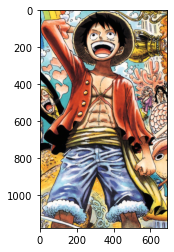

In [37]:
luffy = preprocessamento_imagem_vgg19_nst(imagem_de_base, imagem_de_base)
plt.imshow(luffy[0])

In [8]:
luffy.shape

(1, 1179, 691, 3)

In [9]:
#peso_conteudo = 1
#peso_estilo =  100
#peso_variacao_total = 20
# nunca use as medidas acima

peso_variacao_total = 1e-6
peso_estilo = 1e-6
peso_conteudo = 2.5e-8
linhas_imagem = luffy.shape[1]
colunas_imagem = luffy.shape[2]

In [10]:
def matriz_de_gram(caracteristicas):
    x = tf.transpose(caracteristicas, (2,0,1))
    features = tf.reshape(x, (tf.shape(x)[0], -1 ))
    gram = tf.matmul(features, tf.transpose(features))
    
    return gram

def perca_estilo(estilo, combinacao):
    S = gram_matrix(estilo)
    C = gram_matrix(combinacao)
    channels = 3
    size = luffy.shape[0] * luffy.shape[1]
    return tf.reduce_sum(tf.square(S - C)) / (4.0 * (channels ** 2) * (size ** 2))

def perca_conteudo(base, combinacao):
    return tf.reduce_sum( tf.square(combinacao - base) )
    #return 0.5 * K.sum( K.square(conteudo_gerado - conteudo_original))
    
def perca_variacao_total(x):
    
    a = tf.square( x[:, :linhas_imagem - 1, :colunas_imagem - 1, : ] - x[:, 1:, :colunas_imagem - 1, : ] )
    b = tf.square( x[:, :linhas_imagem - 1, :colunas_imagem - 1, : ] - x[:, :linhas_imagem - 1, 1:,  : ] )    
    return tf.reduce_sum(tf.pow(a + b, 1.25))

In [11]:
imagem_base_pasta = imagem_de_base
imagem_estilo_pasta = imagem_de_estilo

In [12]:
imagem_base = K.variable(preprocessamento_imagem_vgg19_nst(imagem_base_pasta, imagem_base_pasta))
imagem_estilo = K.variable(preprocessamento_imagem_vgg19_nst(imagem_estilo_pasta, imagem_base_pasta))
imagem_combinada = K.placeholder((1, imagem_base.shape[1] , imagem_base.shape[2] , 3))
entrada_de_tensor = K.concatenate([imagem_base, imagem_estilo, imagem_combinada], axis= 0) 

In [26]:
imagem_base.shape[2]

691

In [13]:
modelo = vgg19.VGG19( weights= 'imagenet', include_top= False) # input_tensor= entrada_de_tensor,
dicionario_de_saida = dict( [(layer.name, layer.output) for layer in modelo.layers ] )

In [14]:
extrator_de_caracteristicas = tf.keras.Model(inputs= modelo.inputs, outputs= dicionario_de_saida) 
# lembre-se do tf, não pode ser apenas o keras

In [27]:
camadas_features = ['block1_conv1', 'block2_conv1','block3_conv1', 'block4_conv1','block5_conv1']

def computar_perca(combinada, base, estilo):
    
    '''
    imagem_base = K.variable(preprocessamento_imagem_vgg19_nst(imagem_base_pasta, imagem_base_pasta))
    imagem_estilo = K.variable(preprocessamento_imagem_vgg19_nst(imagem_estilo_pasta, imagem_base_pasta))
    imagem_combinada = K.placeholder((1, imagem_base.shape[1] , imagem_base.shape[2] , 3))
    entrada_de_tensor = K.concatenate([imagem_base, imagem_estilo, imagem_combinada], axis= 0) 
    '''
    entrada_de_tensor = tf.concat([base, estilo, combinada], axis= 0) 
    print(entrada_de_tensor.shape)
    caracteristicas = extrator_de_caracteristicas(entrada_de_tensor)
    
    
    perca = tf.zeros(shape= ())
    
    caracteristica_camada = caracteristicas['block5_conv2'] # o dicionario já faz o papel do feature_extractor(input_tensor)
    caracteristicas_imagem_base = caracteristica_camada[0,:,:,:] 
    caracteristicas_combinacao  = caracteristica_camada[2,:,:,:]
    perca = perca + peso_conteudo * perca_conteudo(caracteristicas_imagem_base, caracteristicas_combinacao)
    
    for layer_name in camadas_features:
        caracteristicas_da_camada = caracteristicas[layer_name]
        caracteristicas_referencia_estilo = caracteristicas_da_camada[1, :, :, :]
        caracteristicas_combinacao = caracteristicas_da_camada[2, :, :, :]
        sl = perca_conteudo(caracteristicas_referencia_estilo, caracteristicas_combinacao)
        perca = perca + ( peso_estilo / len(camadas_features)) * sl
        
    perca = perca + peso_variacao_total * perca_variacao_total(combinada)
    return perca

In [ ]:
#caracteristicas = extrator_de_caracteristicas(entrada_de_tensor)
# tensor with shape[3,64,1179,691]

In [16]:
#@tf.function
def computar_perca_e_grads(combinado, base, estilo):
    with tf.GradientTape() as tape:
        perca = computar_perca(combinado, base, estilo)
    grads = tape.gradient(perca, combinado)
    return perca, grads

In [17]:
pitoco = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=100.0, decay_steps=100, decay_rate=0.96)
otimizador = tf.keras.optimizers.SGD(pitoco)

In [18]:
imagem_base_pasta = imagem_de_base
imagem_estilo_pasta = imagem_de_estilo

imagem_base = preprocessamento_imagem_vgg19_nst(imagem_base_pasta, imagem_base_pasta)
imagem_referencia_estilo = preprocessamento_imagem_vgg19_nst(imagem_estilo_pasta, imagem_base_pasta)
imagem_combinacao = tf.Variable(preprocessamento_imagem_vgg19_nst(imagem_base_pasta, imagem_base_pasta))

In [24]:
tf.concat([imagem_base, imagem_referencia_estilo, imagem_combinacao], axis= 0).shape

TensorShape([3, 1179, 691, 3])

ERROR! Session/line number was not unique in database. History logging moved to new session 1113


In [19]:
def retornar_numero(tensor):
    cu = str(tensor)
    valor = list()
    vez = 0
    numero = ''
    for a in cu:
        if a == '"': 
            vez = vez + 1
        if 0 < vez < 2:
            if a != '"':
                valor.append(a)
    for a in valor[4:]:
        numero = numero + a
    return numero

In [20]:
def deprocess_image(x):
    # Util function to convert a tensor into a valid image
    x = x.reshape((luffy.shape[1] , luffy.shape[2], 3))
    # Remove zero-center by mean pixel
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    #x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype("uint8")
    return x

In [ ]:
epocas = 4000
n = 0
for a in range(1, epocas + 1):
    perca, grads = computar_perca_e_grads(imagem_combinacao, imagem_base, imagem_referencia_estilo)
    otimizador.apply_gradients([(grads, imagem_combinacao)])
    perca = retornar_numero(perca)
    print(a)
    n = n + 1
    if n == 100:
        n = 0

        print(f'epoca: {a}, perca: {perca}')
        nome_imagem = 'C:/Users/pituc/Downloads/pasta_imagens_bases/imagen_bases_estilo_mudado\\' + 'luffy' + f'_iteração_{a}.png'
        imagem_chata = deprocess_image(imagem_combinacao.numpy())
        #tf.keras.preprocessing.image.save_img(nome_imagem, imagem_combinacao) 
        #tf.keras.utils.save_img(f'C:/Users/pituc/Downloads/pasta_imagens_bases/imagen_bases_estilo_mudado\\imagem_{a}', )
        
        tf.keras.preprocessing.image.save_img(nome_imagem, imagem_chata)

(3, 1179, 691, 3)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\pituc\anacondabr\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-28-3fe4c9c60fd6>", line 4, in <module>
    perca, grads = computar_perca_e_grads(imagem_combinacao, imagem_base, imagem_referencia_estilo)
  File "<ipython-input-16-d6daf0b156f7>", line 4, in computar_perca_e_grads
    perca = computar_perca(combinado, base, estilo)
  File "<ipython-input-27-a3b4b9a6a9d0>", line 13, in computar_perca
    caracteristicas = extrator_de_caracteristicas(entrada_de_tensor)
  File "C:\Users\pituc\anacondabr\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\engine\base_layer.py", line 822, in __call__
    outputs = self.call(cast_inputs, *args, **kwargs)
  File "C:\Users\pituc\anacondabr\envs\tensorflow\lib\site-packages\tensorflow_core\python\keras\engine\network.py", line 717, in call
    convert_kwargs_to_cons

In [ ]:
#array_para_ser_imagem_combinada = np.array(imagem_combinacao.numpy)
#cv2.imwrite('C:/Users/pituc/Downloads/imagen_bases_estilo_mudado\\filename.jpeg', array_para_ser_imagem_combinada)

In [6]:
imagem_base_pasta = imagem_de_base
imagem_estilo_pasta = imagem_de_estilo

In [7]:
def preprocessamento_imagem_vgg19_nst(diretorio, shape_esperado):
    Shape = cv2.imread(shape_esperado)
    dimensoes = Shape.shape
    imagem = cv2.imread(diretorio)
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, [dimensoes[1], dimensoes[0]])
    imagem = np.expand_dims(imagem, axis= 0)
    imagem = np.array(imagem, dtype= 'float32')
    return imagem / 255

In [8]:
imagem_base_processada = preprocessamento_imagem_vgg19_nst(imagem_base_pasta, imagem_base_pasta)
imagem_estilo_processada = preprocessamento_imagem_vgg19_nst(imagem_estilo_pasta, imagem_base_pasta)

In [9]:
'''
modelo = vgg19.VGG19( weights= 'imagenet', include_top= False) # input_tensor= entrada_de_tensor,
dicionario_de_saida = dict( [(layer.name, layer.output) for layer in modelo.layers ] )
extrator_de_caracteristicas = tf.keras.Model(inputs= modelo.inputs, outputs= dicionario_de_saida) 
# lembre-se do tf, não pode ser apenas o keras
'''

"\nmodelo = vgg19.VGG19( weights= 'imagenet', include_top= False) # input_tensor= entrada_de_tensor,\ndicionario_de_saida = dict( [(layer.name, layer.output) for layer in modelo.layers ] )\nextrator_de_caracteristicas = tf.keras.Model(inputs= modelo.inputs, outputs= dicionario_de_saida) \n# lembre-se do tf, não pode ser apenas o keras\n"

In [10]:
'''
x = vgg19.preprocess_input(imagem_base_processada * 255)
x = tf.image.resize(x, (224, 224))
vgg = VGG19(weights= 'imagenet', include_top= True)
predicao_de_probabilidades = vgg(x)
predicao_de_probabilidades.shape
'''

"\nx = vgg19.preprocess_input(imagem_base_processada * 255)\nx = tf.image.resize(x, (224, 224))\nvgg = VGG19(weights= 'imagenet', include_top= True)\npredicao_de_probabilidades = vgg(x)\npredicao_de_probabilidades.shape\n"

In [11]:
'''
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(predicao_de_probabilidades.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]
'''

'\npredicted_top_5 = tf.keras.applications.vgg19.decode_predictions(predicao_de_probabilidades.numpy())[0]\n[(class_name, prob) for (number, class_name, prob) in predicted_top_5]\n'

In [12]:
vgg = VGG19(weights= 'imagenet', include_top= False)
print()
for layer in vgg.layers:
    print(layer.name)


input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [13]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [14]:
def camadas_vgg(nomes_camadas):
    vgg = VGG19(weights= 'imagenet', include_top= False)
    vgg.trainable = False
    
    outputs = [vgg.get_layer(nome).output for nome in nomes_camadas]
    
    modelo = tf.keras.Model([vgg.input], outputs)
    return modelo

In [15]:
tf.__version__

'2.6.2'

In [16]:
def gram_matrix(input_tensor):
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

In [17]:
class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleContentModel, self).__init__()
        self.vgg = camadas_vgg(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False
    def call(self, inputs):
        "Expects float input in [0,1]"
        inputs = inputs*255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                          outputs[self.num_style_layers:])

        style_outputs = [gram_matrix(style_output)
                         for style_output in style_outputs]

        content_dict = {content_name: value
                        for content_name, value
                        in zip(self.content_layers, content_outputs)}

        style_dict = {style_name: value
                      for style_name, value
                      in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}

In [18]:
extrator = StyleContentModel( style_layers, content_layers )
resultados = extrator(tf.constant(imagem_base_processada))

In [19]:
print('Styles:')
for name, output in sorted(resultados['style'].items()):
    
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())
    print()

print("Contents:")
for name, output in sorted(resultados['content'].items()):
    print("  ", name)
    print("    shape: ", output.numpy().shape)
    print("    min: ", output.numpy().min())
    print("    max: ", output.numpy().max())
    print("    mean: ", output.numpy().mean())

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.10353431
    max:  35197.348
    mean:  867.3196

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  173439.48
    mean:  31662.29

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  661010.44
    mean:  38156.242

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.27363443
    max:  7507940.0
    mean:  358911.53

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  146427.6
    mean:  2456.3452

Contents:
   block5_conv2
    shape:  (1, 73, 43, 512)
    min:  0.0
    max:  1408.4495
    mean:  18.732813


In [20]:
alvos_estilo = extrator(imagem_estilo_processada)['style']
alvos_conteudo = extrator(imagem_base_processada)['content']
#style_targets = extractor(style_image)['style']
#content_targets = extractor(content_image)['content']

In [21]:
imagem = tf.Variable(imagem_base_processada)

In [22]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
style_weight=1e-2
content_weight=1e4

In [23]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-alvos_estilo[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-alvos_conteudo[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [24]:
def train_step(image):
    with tf.GradientTape() as tape:
        outputs = extrator(image)
        loss = style_content_loss(outputs)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(clip_0_1(image))

In [25]:
import PIL.Image

In [26]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
    tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

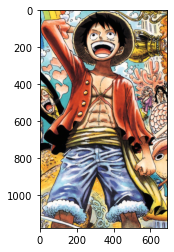

In [31]:
plt.imshow(imagem_base_processada[0])

In [32]:
imagem_base_processada.shape

(1, 1179, 691, 3)

In [27]:
import IPython.display as display

In [33]:
def deprocess_image(x):
    # Util function to convert a tensor into a valid image
    x = x.reshape((imagem_base_processada.shape[1] , imagem_base_processada.shape[2], 3))
    # Remove zero-center by mean pixel
    #x[:, :, 0] += 103.939
    #x[:, :, 1] += 116.779
    #x[:, :, 2] += 123.68
    # 'BGR'->'RGB'
    #x = x[:, :, ::-1]
    #x = np.clip(x, 0, 255).astype("uint8")
    return x

In [34]:
def salvar_imagens(img, epoca):
    nome_imagem = 'C:/Users/pituc/Downloads/pasta_imagens_bases/imagen_bases_estilo_mudado\\' + 'luffy' + f'_iteração_{epoca}.png'
    imagem_chata = deprocess_image(img.numpy())
    tf.keras.preprocessing.image.save_img(nome_imagem, imagem_chata)

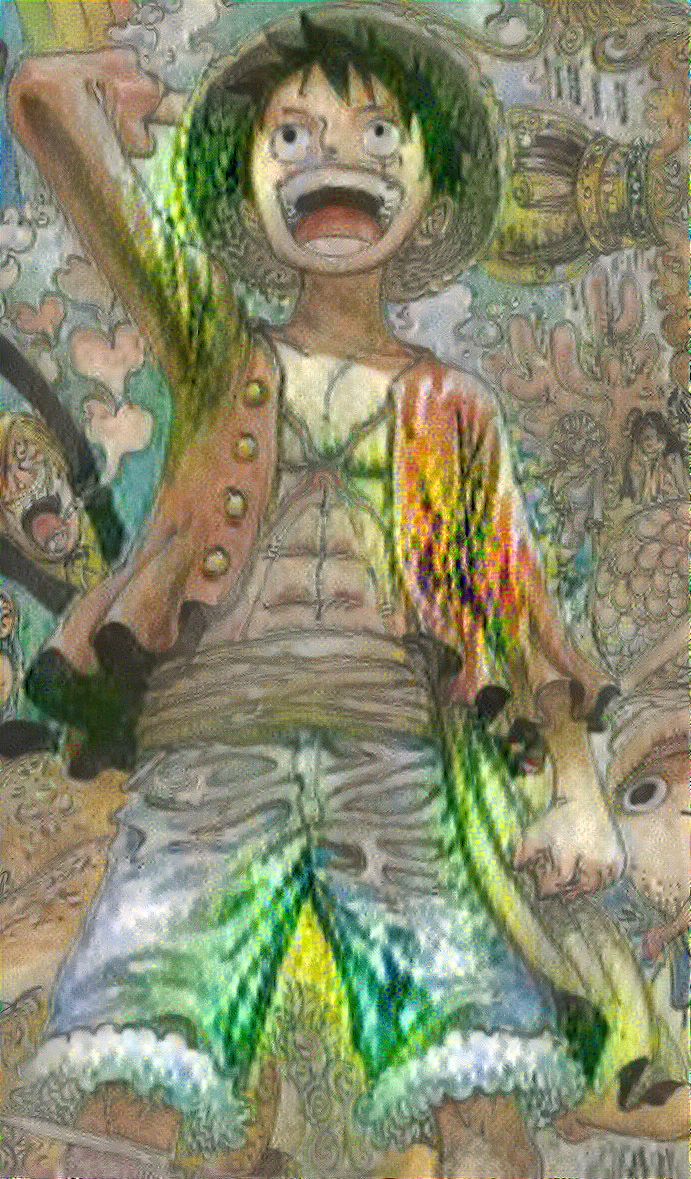

Train step: 1000
Total time: 24108.2


In [35]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(imagem)
        print(".", end='', flush=True)
    display.clear_output(wait=True)
    display.display(tensor_to_image(imagem))
    salvar_imagens(imagem, n)
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [3]:
with open('C:/Users/pituc/Downloads/gutenberg_texto.txt', encoding='utf-8-sig') as t:
    texto = t.read()

In [4]:
import re

In [5]:
texto

'The Project Gutenberg EBook of Aesop\'s Fables, by Aesop\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever. You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Aesop\'s Fables\n\nAuthor: Aesop\n\nRelease Date: February 27, 2004 [EBook #11339]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK AESOP\'S FABLES ***\n\n\n\n\nProduced by Suzanne Shell, Greg Chapman and the Online Distributed\nProofreading Team.\n\n\n\n\nÆSOP\'S FABLES\n\n\nA NEW TRANSLATION\n\nBY V. S. VERNON JONES\n\n\nWITH AN INTRODUCTION\n\nBY G. K. CHESTERTON\n\n\nAND ILLUSTRATIONS\n\nBY ARTHUR RACKHAM\n\n\n1912 EDITION\n\n\n\n\nINTRODUCTION\n\n\n_Æsop embodies an epigram not uncommon in human history; his fame\nis all the more deserved because he never deserved it. The firm\nfoundations of common sense, the shrewd shots at uncommon sense, th

In [6]:
exemplo = 'pitoco pulou, o pitoco %&( roeu, o pitoco correu, }~ pitoco +, pitoco. . para o pitoco'
exemplo = re.sub(' +', '. ', exemplo).strip()
exemplo = exemplo.replace('..', '.')
exemplo

'pitoco. pulou,. o. pitoco. %&(. roeu,. o. pitoco. correu,. }~. pitoco. +,. pitoco. . para. o. pitoco'

In [7]:
exemplo = re.sub('([!"#$%&()*+,-./:;<=>?@[\]^_`{|}~])', r' \1 ', exemplo)
exemplo

'pitoco .  pulou ,  .  o .  pitoco .   %  &  (  .  roeu ,  .  o .  pitoco .  correu ,  .   }  ~  .  pitoco .   +  ,  .  pitoco .   .  para .  o .  pitoco'

In [8]:
exemplo = re.sub('\s{2,}', ' ', exemplo)
exemplo

'pitoco . pulou , . o . pitoco . % & ( . roeu , . o . pitoco . correu , . } ~ . pitoco . + , . pitoco . . para . o . pitoco'

In [40]:
tokenizador = Tokenizer(filters= '')
tokenizador.fit_on_texts([exemplo])
total_de_palavras = len( tokenizador.word_index ) + 1
lista_de_tokens = tokenizador.texts_to_sequences([exemplo])[0]

[2,
 1,
 5,
 3,
 1,
 4,
 1,
 2,
 1,
 6,
 7,
 8,
 1,
 9,
 3,
 1,
 4,
 1,
 2,
 1,
 10,
 3,
 1,
 11,
 12,
 1,
 2,
 1,
 13,
 3,
 1,
 2,
 1,
 1,
 14,
 1,
 4,
 1,
 2]

In [9]:
texto = texto.lower() # na tokenização decidimos colocar tudo minúsculo

tamanho_da_sequencia = 20
inicio_da_historia = '| ' * tamanho_da_sequencia
texto = inicio_da_historia + texto   # fazemos ||||||||||| para a rede entender quando está começando uma história

texto = texto.replace('\n\n\n\n\n', inicio_da_historia) # indicando que quando tivermos um espaço de um parágrafo teremos um novo início
texto = texto.replace('\n', ' ') # indicando que a cada pulo de linha devemos substituir por um espaço      

#texto = re.sub(' +', '. ', texto).strip() # faz o que tu ve na célula acima
#texto = texto.replace('..', '.')          # o re.sub quando encontra um ponto coloca um na frente, para termos apenas um fazemos esse replace

texto = re.sub('([!"#$%&()*+,-./:;<=>?@[\]^_`{|}~])', r' \1 ', texto)

In [10]:
texto

' |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |  the project gutenberg ebook of aesop\'s fables ,  by aesop  this ebook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever .  you may copy it ,  give it away or re - use it under the terms of the project gutenberg license included with this ebook or online at www . gutenberg . org   title :  aesop\'s fables  author :  aesop  release date :  february 27 ,  2004  [ ebook  # 11339 ]   language :  english    *  *  *  start of this project gutenberg ebook aesop\'s fables  *  *  *  |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |  produced by suzanne shell ,  greg chapman and the online distributed proofreading team .  |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |  æsop\'s fables   a new translation  by v .  s .  vernon jones   with an introduction  by g .  k .  chesterton   and illustrations  by arthur rackham   191

In [11]:
from keras.preprocessing.text import Tokenizer

In [12]:
tokenizador = Tokenizer(filters= '')
tokenizador.fit_on_texts([texto])
total_de_palavras = len( tokenizador.word_index ) + 1
lista_de_tokens = tokenizador.texts_to_sequences([texto])[0]

In [13]:
import numpy as np
from keras.utils import np_utils

In [15]:
len(tokenizador.word_index)

4917

In [16]:
def gerar_sequencias(listas_de_tokens, passos):
    x = []
    y = []
    for i in range(0, len(lista_de_tokens) - tamanho_da_sequencia, passos):
        x.append(listas_de_tokens[i: i + tamanho_da_sequencia] )
        y.append(listas_de_tokens[i + tamanho_da_sequencia])
        
    y = np_utils.to_categorical(y, num_classes= total_de_palavras)
    
    numero_sequencia = len(x)
    print('Number of sequences:', numero_sequencia, "\n")
    
    return x, y, numero_sequencia

passos = 1
tamanho_da_sequencia = 20
x, y, numero_sequencia = gerar_sequencias(lista_de_tokens, passos)

x = np.array(x)
y = np.array(y)

Number of sequences: 57629 



In [20]:
from keras.layers import Dense, LSTM, Input, Embedding, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [34]:
numeros_unidades = 256
tamanho_embedding = 100

texto_in = Input(shape= (None,))
camada = Embedding(total_de_palavras, tamanho_embedding)(texto_in)
camada = LSTM(numeros_unidades)(camada)
camada = Dropout(rate= 0.2)(camada)
texto_saida = Dense(total_de_palavras, activation= 'softmax')(camada)

modelo = Model(texto_in, texto_saida)
otimizador = RMSprop(0.001)
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador)

In [35]:
modelo.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 100)         491800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               365568    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4918)              1263926   
Total params: 2,121,294
Trainable params: 2,121,294
Non-trainable params: 0
_________________________________________________________________


In [26]:
x1 = x[:int(x.shape[0] / 2)]
y1 = y[:int(x.shape[0] / 2)]

In [32]:
x2 = x[int(x.shape[0] / 2):]
y2 = y[int(x.shape[0] / 2):]

In [28]:
y1.shape

(28814, 4918)

In [ ]:
modelo.fit_generator()

In [37]:
epocas = 100
batch_size= 32
modelo.fit(x1, y1, epochs=epocas, batch_size=batch_size, shuffle = True)


Epoch 1/100
901/901 [==============================] - 12s 9ms/step - loss: 5.3545
Epoch 2/100
901/901 [==============================] - 8s 9ms/step - loss: 4.9594
Epoch 3/100
901/901 [==============================] - 8s 9ms/step - loss: 4.7959
Epoch 4/100
901/901 [==============================] - 9s 10ms/step - loss: 4.6833
Epoch 5/100
901/901 [==============================] - 9s 10ms/step - loss: 4.5873
Epoch 6/100
901/901 [==============================] - 9s 10ms/step - loss: 4.5042
Epoch 7/100
901/901 [==============================] - 9s 10ms/step - loss: 4.4306
Epoch 8/100
901/901 [==============================] - 9s 10ms/step - loss: 4.3637
Epoch 9/100
901/901 [==============================] - 9s 10ms/step - loss: 4.3048
Epoch 10/100
901/901 [==============================] - 9s 10ms/step - loss: 4.2398
Epoch 11/100
901/901 [==============================] - 9s 10ms/step - loss: 4.1862
Epoch 12/100
901/901 [==============================] - 9s 10ms/step - loss: 4.1330
Epo

901/901 [==============================] - 9s 10ms/step - loss: 3.1553
Epoch 99/100
901/901 [==============================] - 9s 10ms/step - loss: 3.1590
Epoch 100/100
901/901 [==============================] - 9s 10ms/step - loss: 3.1405


In [33]:
modelo.fit(x2, y2, epochs=epocas, batch_size=batch_size, shuffle = True)

Epoch 1/100
901/901 [==============================] - 8s 9ms/step - loss: 6.7381
Epoch 2/100
901/901 [==============================] - 9s 10ms/step - loss: 5.9836
Epoch 3/100
547/901 [=================>............] - ETA: 3s - loss: 5.5971

KeyboardInterrupt: 